# Maybe it's possible to split the df 

In [1]:
from model import model,preprocessing,data_split,highlight_entry,create_transformation,plot_dataset_splitting
from Configuration import Configuration
from gluonts.dataset import common
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.util import to_pandas
import matplotlib.pyplot as plt
import numpy as np
from gluonts.evaluation import make_evaluation_predictions
import gluonts
from gluonts.dataset.split import split 
config=Configuration()
df=pd.read_csv("Influenza.csv",sep=',')

# List Dataset

In [2]:
ld_df=preprocessing(config,df,check_count=False,output_type="LD")
training_data, test_template = split(ld_df, date=pd.Period(config.train_end_time, freq=config.freq))
test_pairs = test_template.generate_instances(prediction_length=config.prediction_length,windows=config.windows,)
#plot_dataset_splitting(ld_df, training_data, test_pairs)
#f1,t1=model(config,training_data,test_pairs)
#print(list(f1))
#Dieser Fehler hindert uns daran die Forecasts auszugeben...

In [3]:
from gluonts.dataset.common import ListDataset
for test_input, test_label in test_pairs:
    print(test_label)
test_data= ListDataset(
[{"start": test_label['start'],"target": test_label['target']} for test_input,test_label in test_pairs],freq=config.freq)
print(test_data)
print(training_data)

{'start': Period('2018-01-01/2018-01-07', 'W-SUN'), 'target': array([  8.,   4.,  18.,  35.,  49.,  52.,  49., 134., 113.,  77.,  78.,
        22.,  24.,   5.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.], dtype=float32)}
{'start': Period('2018-07-02/2018-07-08', 'W-SUN'), 'target': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)}
{'start': Period('2018-12-31/2019-01-06', 'W-SUN'), 'target': array([ 2.,  4.,  4., 11., 36., 29., 41., 37., 37., 57., 24., 19., 10.,
       11.,  5.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
      dtype=float32)}
{'start': Period('2019-07-01/2019-07-07', 'W-SUN'), 'target': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1.], dtype=float32)}
{'start': Period('2018-01-01/2018-01-07', 'W-SUN'), 'target': array([ 0.,  1.,  0.,  1.,  3.,  2.,  7., 23., 32., 49., 48

In [4]:
f1,t1=model(config,training_data,test_data)

100%|██████████| 50/50 [00:53<00:00,  1.07s/it, epoch=4/4, avg_epoch_loss=0.812]


In [5]:
print(f1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



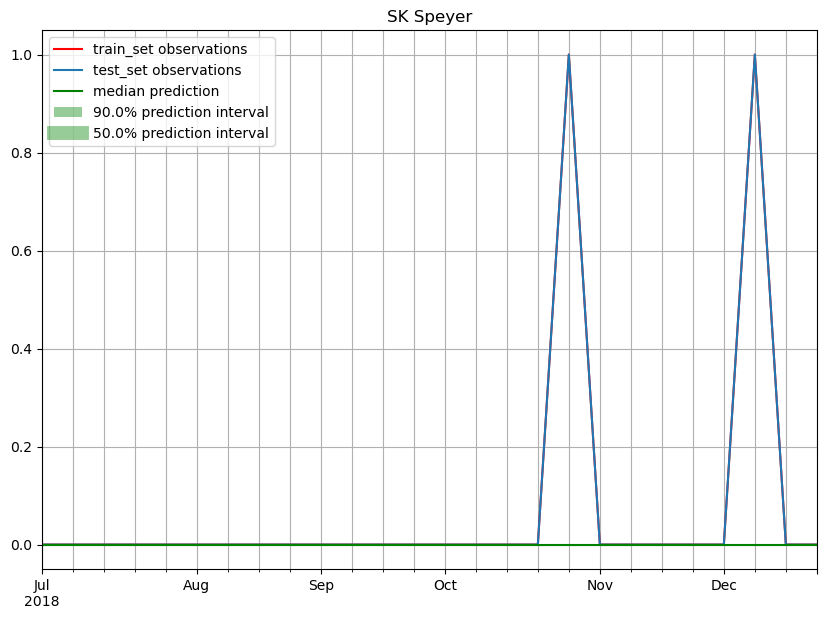

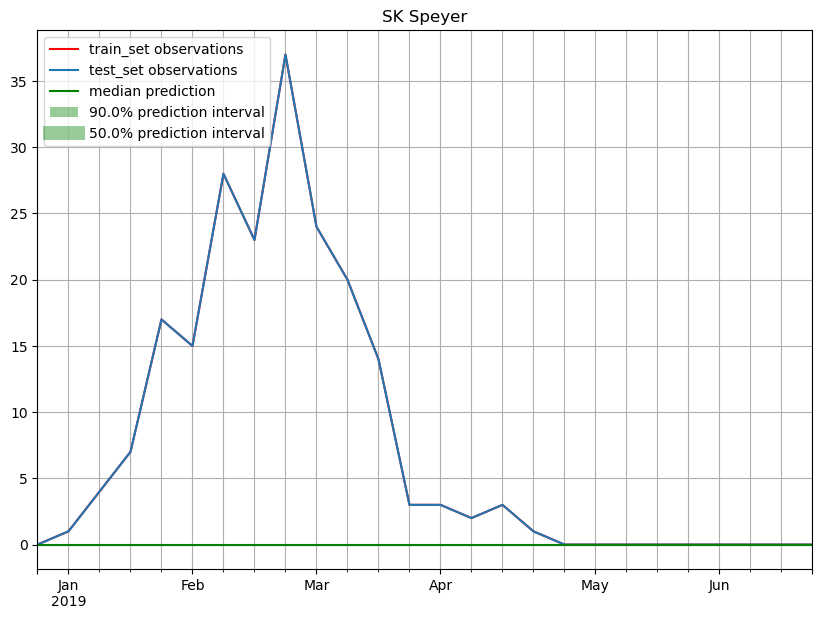

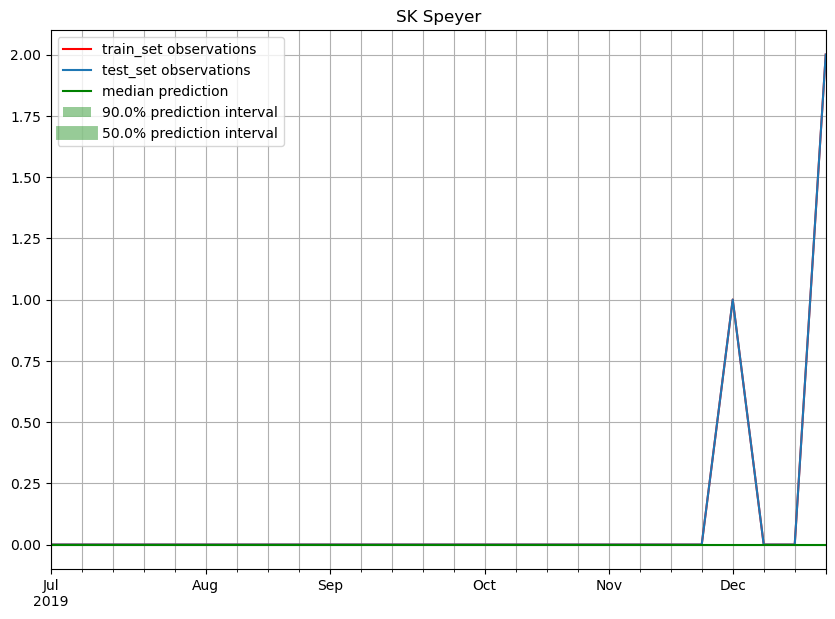

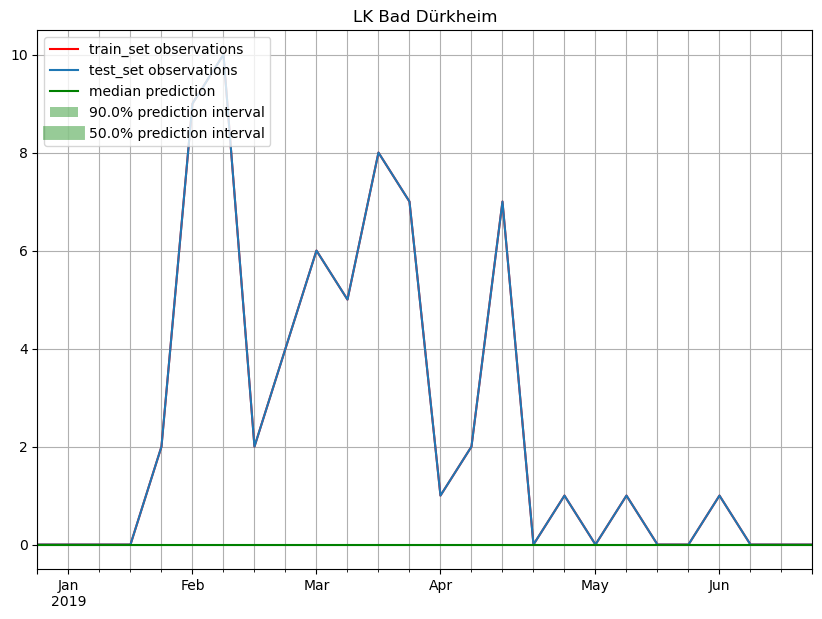

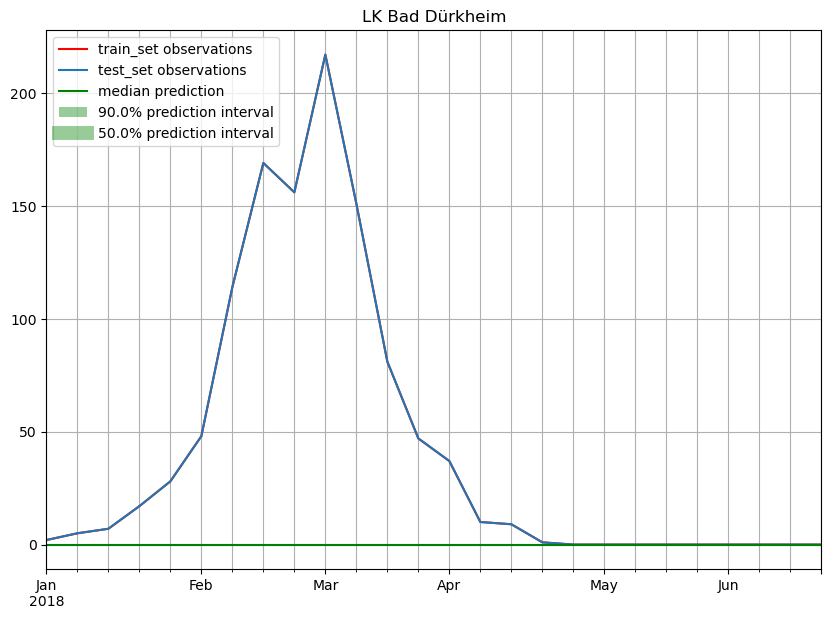

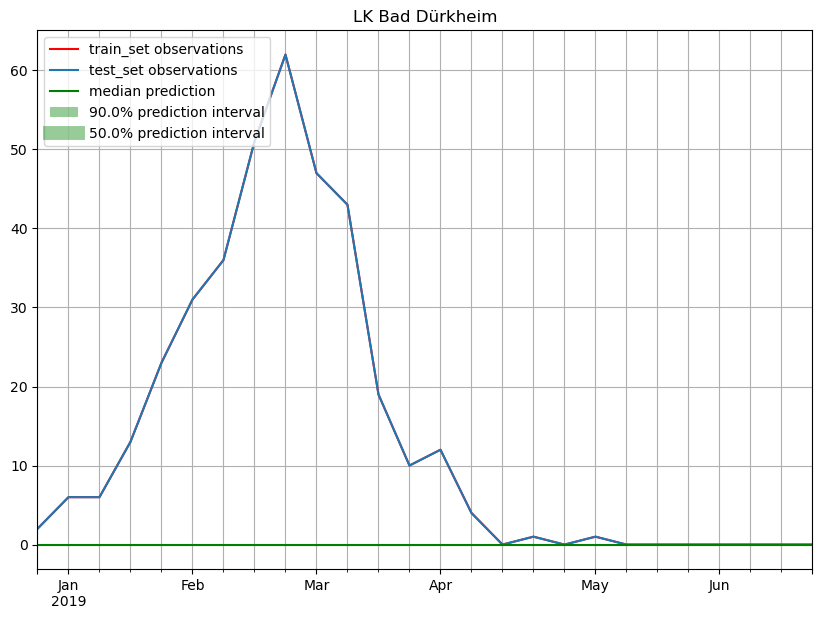

In [14]:
def plot_prob_forecasts(ts_entry, forecast_entry,test_data,title=""):
    plot_length = 104
    prediction_intervals = (50.0, 90.0)
    legend = ['train_set observations',"test_set observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    to_pandas(test_data).to_timestamp().plot(color="r")
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color="g")
    plt.grid(which="both")
    plt.title(title)
    plt.legend(legend, loc="upper left")
    plt.show()

locations=[x for x in df.loc[:,'location'].unique()]
selected_regions=["SK Speyer","LK Bad Dürkheim"]
for location_index in [locations.index(location) for location in selected_regions]:
    for test_index in [window*location_index for window in range(1,config.windows)]:
        ts_entry=t1[test_index]
        forecast_entry=f1[test_index]
        #print(locations[k])
        #fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        #plt.title(f'{locations[k]}')
        #plt.plot((df.loc[(df['location']==str(locations[k]))&(df.index<=config.test_end_time) &(df.index>=config.train_start_time)].index),
        #         df.loc[(df['location']==str(locations[k]))&(df.index<=config.test_end_time) &(df.index>=config.train_start_time),'value'])
        #plt.show()
        plot_prob_forecasts(ts_entry, forecast_entry,test_data[test_index],title=f'{locations[location_index]}')

# Pandas Dataset

In [15]:
pd_df=preprocessing(config,df,check_count=False,output_type="PD")
training_data, test_template = split(pd_df, date=pd.Period(config.train_end_time, freq=config.freq))
test_pairs = test_template.generate_instances(prediction_length=config.prediction_length,windows=config.windows,)

In [17]:
#for test_input, test_label in test_pairs:
    #print(test_label)
test_data= PandasDataset(
[{"start": test_label['start'],"target": test_label['target'],"item_id":test_label["item_id"]} for test_input,test_label in test_pairs],freq=config.freq)
print(test_data)
print(training_data)

AttributeError: 'dict' object has no attribute 'index'

In [ ]:
f1,t1=model(config,training_data,test_data)

In [ ]:
def plot_prob_forecasts(ts_entry, forecast_entry,test_data,title=""):
    plot_length = 104
    prediction_intervals = (50.0, 90.0)
    legend = ['train_set observations',"test_set observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    to_pandas(test_data).to_timestamp().plot(color="r")
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color="g")
    plt.grid(which="both")
    plt.title(title)
    plt.legend(legend, loc="upper left")
    plt.show()

locations=[x for x in df.loc[:,'location'].unique()]
selected_regions=["SK Speyer","LK Bad Dürkheim"]
for location_index in [locations.index(location) for location in selected_regions]:
    for test_index in [window*location_index for window in range(1,config.windows)]:
        ts_entry=t1[test_index]
        forecast_entry=f1[test_index]
        #print(locations[k])
        #fig, ax = plt.subplots(1, 1, figsize=(10, 7))
        #plt.title(f'{locations[k]}')
        #plt.plot((df.loc[(df['location']==str(locations[k]))&(df.index<=config.test_end_time) &(df.index>=config.train_start_time)].index),
        #         df.loc[(df['location']==str(locations[k]))&(df.index<=config.test_end_time) &(df.index>=config.train_start_time),'value'])
        #plt.show()
        plot_prob_forecasts(ts_entry, forecast_entry,test_data[test_index],title=f'{locations[location_index]}')

# Own Split Implementation

In [4]:
cs_df=preprocessing(config,df,check_count=False,output_type="corrected_df")

In [52]:
from datetime import datetime
train_set=cs_df.loc[(cs_df.index<=config.test_end_time) &(cs_df.index>=config.train_start_time),:]
test_set=cs_df.loc[(cs_df.index>=config.train_end_time) &(cs_df.index<=config.test_end_time),:]
window_dates=[]
for window in range(1,config.windows):
    unique_weeks=test_set.index.unique()
    selected_split_week=unique_weeks[-window*config.prediction_length:-window*config.prediction_length +1]
    window_dates.append(datetime(selected_split_week.year[0],selected_split_week.month[0],selected_split_week.day[0]))
    
test_windows=[test_set.loc[test_set.index<window_date,:] for window_date in window_dates]
#test_set=PandasDataset(test_windows,freq=config.freq)
test_set1=PandasDataset.from_long_dataframe(dataframe=test_windows[0],item_id='location', target="value",freq="W-SUN")
test_set2=PandasDataset.from_long_dataframe(dataframe=test_windows[2],item_id='location', target="value",freq="W-SUN")
print(test_windows)
test_set=PandasDataset(test_set1,test_set1,freq=config.freq)

[            Unnamed: 0    year  week age_group            location  value
2018-01-07       104.0  2018.0   1.0       00+  LK Alb-Donau-Kreis    8.0
2018-01-14       105.0  2018.0   2.0       00+  LK Alb-Donau-Kreis    4.0
2018-01-21       106.0  2018.0   3.0       00+  LK Alb-Donau-Kreis   18.0
2018-01-28       107.0  2018.0   4.0       00+  LK Alb-Donau-Kreis   35.0
2018-02-04       108.0  2018.0   5.0       00+  LK Alb-Donau-Kreis   49.0
...                ...     ...   ...       ...                 ...    ...
2019-06-02     21237.0  2019.0  22.0       00+      SK Zweibrücken    0.0
2019-06-09     21238.0  2019.0  23.0       00+      SK Zweibrücken    0.0
2019-06-16     21239.0  2019.0  24.0       00+      SK Zweibrücken    0.0
2019-06-23     21240.0  2019.0  25.0       00+      SK Zweibrücken    0.0
2019-06-30     21241.0  2019.0  26.0       00+      SK Zweibrücken    0.0

[32058 rows x 6 columns],             Unnamed: 0    year  week age_group            location  value
2018-01-07

AttributeError: 'PandasDataset' object has no attribute 'index'

100%|██████████| 50/50 [00:06<00:00,  8.14it/s, epoch=5/5, avg_epoch_loss=3.9]


[1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1957-08    467.0
1957-09    404.0
1957-10    347.0
1957-11    305.0
1957-12    336.0
Freq: M, Length: 108, dtype: float32, 1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1958-08    505.0
1958-09    404.0
1958-10    359.0
1958-11    310.0
1958-12    337.0
Freq: M, Length: 120, dtype: float32, 1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1959-08    559.0
1959-09    463.0
1959-10    407.0
1959-11    362.0
1959-12    405.0
Freq: M, Length: 132, dtype: float32]


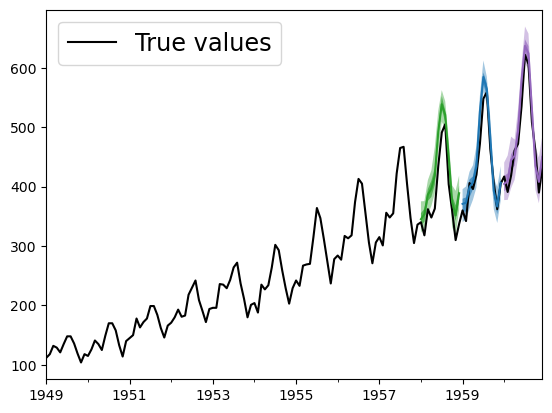

In [50]:
import matplotlib.pyplot as plt
from gluonts.dataset.util import to_pandas
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.model.deepar import DeepAREstimator
from gluonts.mx import Trainer

dataset = get_dataset("airpassengers")

deepar = DeepAREstimator(prediction_length=12, freq="M", trainer=Trainer(epochs=5))
model = deepar.train(dataset.train)

# Make predictions
true_values = to_pandas(list(dataset.test)[0])
true_values.to_timestamp().plot(color="k")

prediction_input = PandasDataset([true_values[:-36], true_values[:-24], true_values[:-12]])
print([true_values[:-36], true_values[:-24], true_values[:-12]])
predictions = model.predict(prediction_input)

for color, prediction in zip(["green", "blue", "purple"], predictions):
    prediction.plot(color=f"tab:{color}")

plt.legend(["True values"], loc="upper left", fontsize="xx-large")